<h1 style="color:red">Projeto 4 - Árvore de decisão e visualizando as decisões de um estimador</h1>

- Trata-se de um banco de dados fictício em que cada linha representa um carro à venda em uma loja online. Os carros são de diversos donos diferentes, e alguns desses carros foram vendidos e outros não. Abaixo temos os cinco primeiros carros da tabela.

| milage_per_year | model_year | price | sold |
|-----------------|------------|-------|------|
|  21801 |      2000     |    30941.02    |  yes  | 
|   7843  |     1998    |    	40557.96   |   yes  |  
|   7109  |   	2006     |    	89627.5   |   no  |   
|  26823  |    	2015     |    95276.14   |   no  |   


- A coluna "sold" representa os carros que foram ou não vendidos: "yes" para os vendidos e "no" para os não. Temos três features para cada um dos carros: a primeira, "milageperyear" representa quantas milhas o carro fez por ano; "modelyear" representa o ano de cada modelo (que é diferente do ano de fabricação); e, por fim, temos o "price", ou seja, o preço de venda cada carro.

> Nota: Estamos trabalhando com a medida em milhas, e não com quilômetros, pois os dados são americanos.

- De acordo com estas variáveis, tentaremos classificar se um carro será vendido ou não. Pensando no negócio da empresa, com esse tipo de informação, ela poderia ajudar seus clientes a concretizar sua venda, criando condições mais atrativas para possíveis compradores com base em dados reais e de acordo com as características de cada carro.  

In [1]:
import pandas as pd
import numpy as np
import graphviz
from datetime import datetime
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score as accuracy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"

dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
a_renomear = { 
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}

dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
a_trocar = {
    'no': 0,
    'yes': 1
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [5]:
# vamos criar uma coluna da idade do modelo do carro

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo

dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [6]:
# tranformar milhas por ano em km por ano
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934

# tirar colunas que não vamos usar
dados = dados.drop(columns=["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [7]:
# separar para o modelo
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [8]:
# stratificar é igualar o maximo possivel os dados de treino_y e teste_y

SEED = 5

np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size=0.25,
                                                        stratify=y)

print(f"Treinaremos com {len(treino_x)} \nTestaremos com {len(teste_x)}")

# treinar o modelo
model = LinearSVC(dual=False)
model.fit(treino_x, treino_y)

previsoes = model.predict(teste_x)

# visualizar nossa acuracia
taxa_de_acerto = accuracy(teste_y, previsoes)
taxa_de_acerto = round(taxa_de_acerto, 4)

print(f"Taxa de acerto: {taxa_de_acerto * 100} %")

Treinaremos com 7500 
Testaremos com 2500
Taxa de acerto: 65.24 %


In [9]:
# temos que ver se a acuracia ou taxa de acerto acima é boa ou não
# para isso vamos usar uma biblioteca para classificar uma comparação

# dummy_stratified vai usar 50% de 1 e 50% de 0 ou mais perto disso 
dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
acuracia = round((dummy_stratified.score(teste_x, teste_y) * 100), 4)

"""
previsoes_dummy = dummy_stratified.predict(teste_x)

# visualizar nossa acuracia
taxa_de_acerto_dummy = accuracy(teste_y, previsoes_dummy)
taxa_de_acerto_dummy = round((taxa_de_acerto_dummy * 100), 4)
"""

print(f"Acuracia do dummy mostfrequent: {acuracia} %")

Acuracia do dummy mostfrequent: 52.44 %


In [10]:
# dummy_mostfrequent vai usar o mais frequente
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = round((dummy_mostfrequent.score(teste_x, teste_y) * 100), 4)

"""
previsoes_dummy = dummy_mostfrequent.predict(teste_x)

# visualizar nossa acuracia
taxa_de_acerto_dummy = accuracy(teste_y, previsoes_dummy)
taxa_de_acerto_dummy = round((taxa_de_acerto_dummy * 100), 4)
"""

print(f"Acuracia do dummy mostfrequent: {acuracia} %")

Acuracia do dummy mostfrequent: 58.0 %


> Como obtemos uma acurácia menor, a estratégia dummy_stratified nos parece mais razoável como baseline, e é ela que queremos superar. 

In [11]:
# vamos reescarlar tudo, testa outras metricas

SEED = 5

np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size=0.25,
                                                        stratify=y)

print(f"Treinaremos com {len(treino_x)} \nTestaremos com {len(teste_x)}")

# escalar e treinar
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


# treinar o modelo com SVC
model = SVC()
model.fit(treino_x, treino_y)

previsoes = model.predict(teste_x)

# visualizar nossa acuracia
taxa_de_acerto = accuracy(teste_y, previsoes)
taxa_de_acerto = round(taxa_de_acerto, 4)

print(f"Taxa de acerto: {taxa_de_acerto * 100} %")

Treinaremos com 7500 
Testaremos com 2500
Taxa de acerto: 77.48 %


> Até o momento, utilizamos dois classificadores reais baseados em Support Vector Machine, o LinearSVC e SVC. Usamos, ainda, dois classificadores simples (Dummy Classifiers) para definir nosso baseline.

> Com o SVC, depois de reescalarmos os dados, a acurácia tem um ganho impressionante. Porém, ainda não temos um algoritmo de classificação que nos forneça suas regras internas para que possamos entender como certas decisões são tomadas.

> Existem algoritmos que exibem uma sequência de decisões com base nos dados fornecidos, como por exemplo um carro ter menos quilometragens rodadas e ser mais novo, e como essas decisões influenciam na classificação, em uma espécie de "árvore de decisões".

> Não à toa, tais classificadores são chamados de decision tree classifiers. Existem vários algoritmos desse tipo, e nesse curso usaremos o DecisionTreeClassifier padrão do próprio SKLearn.

> A forma de utilizarmos esse classificador é bastante parecida com tudo o que fizemos até agora: vamos copiar o código que criamos para o SVC(), utilizando, ao invés disso, o DecisionTreeClassifier(), que deverá ser importado do módulo sklearn.tree.

> Lembrando que você não precisa ter todas essas importações visíveis, porque elas já foram realizadas anteriormente. Porém, elas serão mantidas no código para que você possa colocá-las facilmente em um arquivo Python.

In [21]:
# precisamos de um algoritimo que me de as regras que estão sendo tomadas

SEED = 5

np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size=0.25,
                                                        stratify=y)

print(f"Treinaremos com {len(treino_x)} \nTestaremos com {len(teste_x)}")

# para arvore de decissão não precisamos de escaladores
"""
# escalar e treinar
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)
"""

# treinar o modelo com SVC
# para melhorar a visualização no futuro grafico usamos max_depth=2
model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_treino_x, treino_y)

previsoes = model.predict(raw_teste_x)

# visualizar nossa acuracia
taxa_de_acerto = accuracy(teste_y, previsoes)
taxa_de_acerto = round(taxa_de_acerto, 4)

print(f"Taxa de acerto: {taxa_de_acerto * 100} %")

Treinaremos com 7500 
Testaremos com 2500
Taxa de acerto: 79.28 %


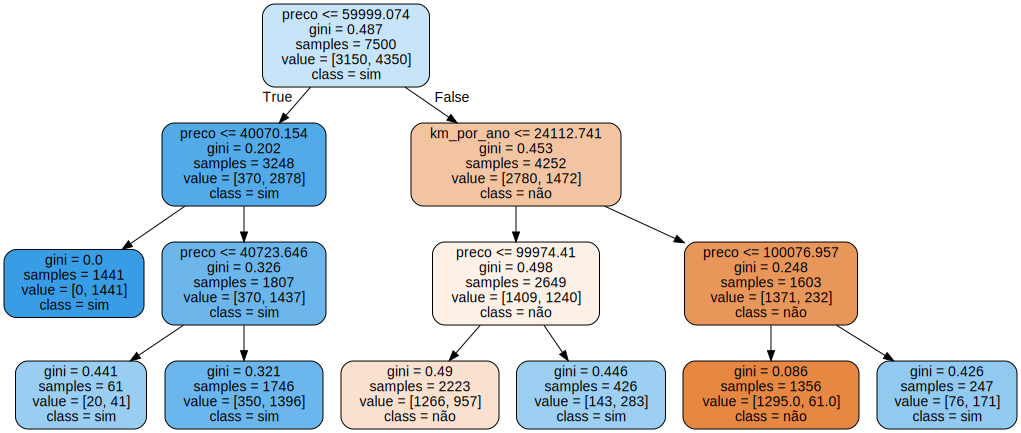

In [22]:
# criando grafico do model
# instalar na maquina que o modelo estiver rodadno via terminal o graphviz: sudo apt-get install graphviz

features =x.columns

dot_date = export_graphviz(model, out_file=None,
                           filled=True, rounded=True,
                           feature_names=features,
                           class_names=["não", "sim"])
grafico = graphviz.Source(dot_date)
grafico